In [32]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn import metrics

***

<br>

# Cross Validating a Trained Decision Tree
*__Source__*: *Approaching Almost Any Machine Learning Problem* by **Abishek Thakur** <br>
*__Dataset__*: **Red Wine Quality** https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

<br>

***

Cross Validation is a way to ensure that our model fits the data perfectly. Basicly, doing cross validation is to separates the training data to be train sets and validation sets.

In [12]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
quality_mapping = { 
    3:0,
    4:1,
    5:2, 
    6:3, 
    7:4, 
    8:5
}

wine_df.loc[:, 'quality'] # before mapping

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [14]:
wine_df.loc[:, 'quality'] = wine_df['quality'].map(quality_mapping) # map values to the one we defined on quality_mapping dict

wine_df.loc[:, 'quality'] # after mapping

0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64

In [18]:
# splitting the features from the label
X = wine_df.loc[:, wine_df.columns != 'quality'] 
y = wine_df['quality']

In [17]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [19]:
y

0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # split the dataset to train set and test set

In [34]:
print(f'X_train { X_train.shape }')
print(f'X_test { X_test.shape }')
print(f'y_train { y_train.shape }')
print(f'y_test { y_test.shape }')

X_train (1071, 11)
X_test (528, 11)
y_train (1071,)
y_test (528,)


The classifier used was a **Decision Tree**. Sklearn's Decision Tree has a `max_depth` parameter which control how deep should the decision tree go. We will initialize two decision tress with different `max_depth` value and compare the result to see if the parameter actually make any difference to the model accuracy.

In [47]:
first_classifier = tree.DecisionTreeClassifier(max_depth=3) # initialize a decision tree with max_depth of 3
second_classifier = tree.DecisionTreeClassifier(max_depth=7) # initialize a decision tree with max_depth of 7

first_classifier.fit(X_train, y_train)
second_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [48]:
# test both models and compare their accuracies
first_test_accuracy = metrics.accuracy_score(y_train, first_classifier.predict(X_train))
second_test_accuracy = metrics.accuracy_score(y_train, second_classifier.predict(X_train))

first_test_accuracy, second_test_accuracy

(0.6013071895424836, 0.7843137254901961)

As we can see, the accuracy differs between the two models. We can now train and evaluate multiple models with different `max_depth` value and then plot it to visualize each of their accuracies.

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [50]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [51]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [54]:
for depth in range(1, 25):
    c = tree.DecisionTreeClassifier(max_depth=depth)

    c.fit(X_train, y_train)

    train_accuracy = metrics.accuracy_score(y_train, c.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, c.predict(X_test))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [55]:
train_accuracies, test_accuracies

([0.5,
  0.5676937441643324,
  0.5676937441643324,
  0.5676937441643324,
  0.6013071895424836,
  0.6451914098972923,
  0.6881419234360411,
  0.7292250233426704,
  0.7852474323062558,
  0.8244631185807656,
  0.8683473389355743,
  0.9140989729225023,
  0.9514472455648926,
  0.9673202614379085,
  0.9822595704948646,
  0.9906629318394025,
  0.9971988795518207,
  0.9981325863678805,
  0.9990662931839402,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.5,
  0.5246212121212122,
  0.5246212121212122,
  0.5208333333333334,
  0.5473484848484849,
  0.5511363636363636,
  0.5492424242424242,
  0.5587121212121212,
  0.5549242424242424,
  0.5643939393939394,
  0.5890151515151515,
  0.5776515151515151,
  0.5738636363636364,
  0.5625,
  0.5587121212121212,
  0.5643939393939394,
  0.5511363636363636,
  0.5435606060606061,
  0.5681818181818182,
  0.5511363636363636,
  0.5549242424242424,
  0.5625,
  0.553030303030303,
  0.5454545454545454,
  0.553030303030303])

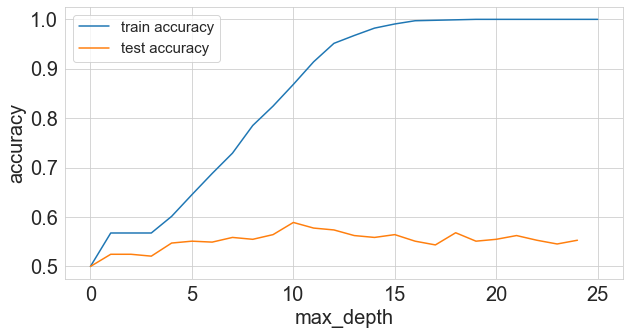

In [56]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')

plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')

plt.legend(loc='upper left', prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)

plt.show()

As we can see, the best output on the test set is on where the `max_depth` value equals to 10. But the train accuracy never really stop growing until it reaches perfection. This kind of graph could tell us that the model is probably *__overfitting__*.

*__overfitting__* is when the model does very well on the train set but not so good on the test set. Another definition of overfitting would be when *the test loss increases as we keep improving training loss*.

When working with a lot of data, we will observe that the loss for both the training and test set will decrease as we keep training the model. However at some point the test loss will reach its minima, and after that, it will start increasing even though training loss decreases further. We must stop training where the validation loss reaches its minimum value.